<a href="https://colab.research.google.com/github/mahmoud-assaf/PlayingFastAI/blob/main/PlayingFastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 189 kB 42.8 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 51 kB 290 kB/s 
Mounted at /content/gdrive


In [4]:
from fastbook import *
urls = search_images_ddg('hussein fahmy', max_images=100)
len(urls),urls[60]

(100,
 'https://i.pinimg.com/736x/23/ee/f4/23eef48b6088ef438ed3e29803745a2c--egyptian-movies-egyptian-actress.jpg')

In [5]:
from fastbook import *
key = os.environ.get('AZURE_SEARCH_KEY', '8b2d4168aa8f4aa9b9e6774653cdf04d')


In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)


150

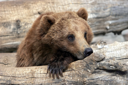

In [ ]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)



In [16]:
bear_types = 'grizzly','black','teddy'
path = Path('/content/gdrive/MyDrive/bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))



In [17]:
fns = get_image_files(path)
fns

(#440) [Path('/content/gdrive/MyDrive/bears/grizzly/00000000.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000007.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000003.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000002.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000001.jpeg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000008.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000009.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000006.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000011.jpg'),Path('/content/gdrive/MyDrive/bears/grizzly/00000012.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = bears.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

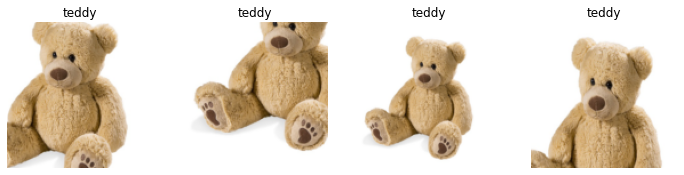

In [12]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.276640,0.110028,0.045977,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.107269,0.065240,0.011494,00:30
1,0.086090,0.090410,0.011494,00:31
2,0.063082,0.121806,0.011494,00:31
3,0.048696,0.127310,0.011494,00:31


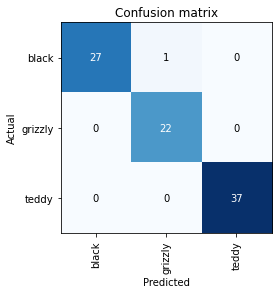

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [26]:
learn.export()

In [28]:
learn_inf = load_learner('export.pkl')

In [29]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [33]:
btn_upload = SimpleNamespace(data = ['images/bear55.jpg'])

img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [34]:
pred,pred_idx,probs = learn_inf.predict(img)

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred



Label(value='Prediction: grizzly; Probability: 0.9998')

In [35]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
from ipywidgets import *
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])



In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila